<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Nursery_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('nursery.csv')
df.head(11)

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


In [3]:
df.tail(11)

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
12949,great_pret,very_crit,foster,more,critical,convenient,problematic,priority,spec_prior
12950,great_pret,very_crit,foster,more,critical,convenient,problematic,not_recom,not_recom
12951,great_pret,very_crit,foster,more,critical,inconv,nonprob,recommended,spec_prior
12952,great_pret,very_crit,foster,more,critical,inconv,nonprob,priority,spec_prior
12953,great_pret,very_crit,foster,more,critical,inconv,nonprob,not_recom,not_recom
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,recommended,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [4]:
df.shape

(12960, 9)

In [5]:
df.columns

Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'final evaluation'],
      dtype='object')

In [6]:
df.dtypes

,0
parents,object
has_nurs,object
form,object
children,object
housing,object
finance,object
social,object
health,object
final evaluation,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   parents           12960 non-null  object
 1   has_nurs          12960 non-null  object
 2   form              12960 non-null  object
 3   children          12960 non-null  object
 4   housing           12960 non-null  object
 5   finance           12960 non-null  object
 6   social            12960 non-null  object
 7   health            12960 non-null  object
 8   final evaluation  12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [10]:
df.isnull().sum()

,0
parents,0
has_nurs,0
form,0
children,0
housing,0
finance,0
social,0
health,0
final evaluation,0


In [9]:
df.describe(include = 'all')

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


# Handling Outliers

In [24]:
df['social'] = pd.to_numeric(df['social'], errors = 'coerce')

Q1 = df['social'].quantile(0.25)
Q3 = df['social'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df_outliers = df[(df['social'] >= lower_bound) & (df['social'] <= upper_bound)].copy()

print('Before removing outliers', len(df))
print('Before after outliers', len(df_outliers))

Before removing outliers 12960
Before after outliers 0


In [25]:
print(df['housing'].unique())

[nan]


# After removing ouliers from the social columns from the dataset all the values are removed as it was all outliers.

# Univariate Analysis

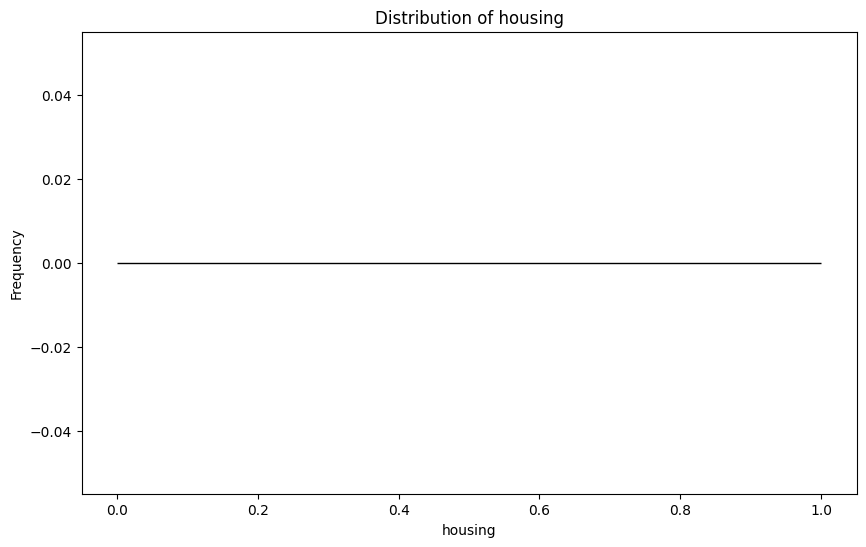

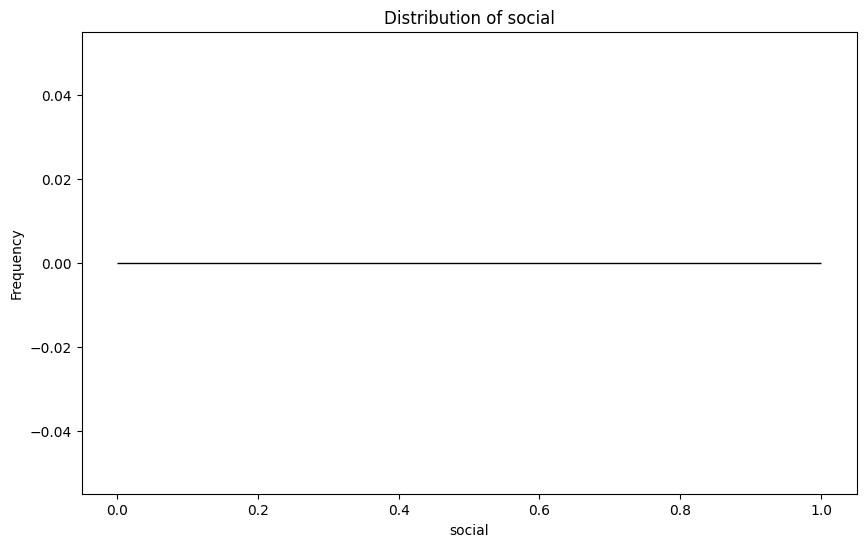

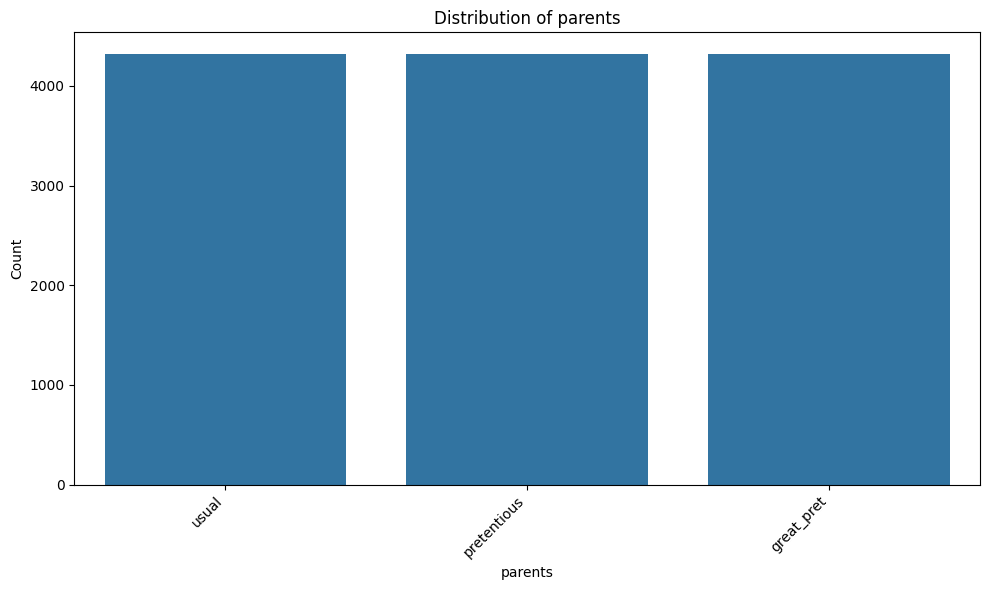

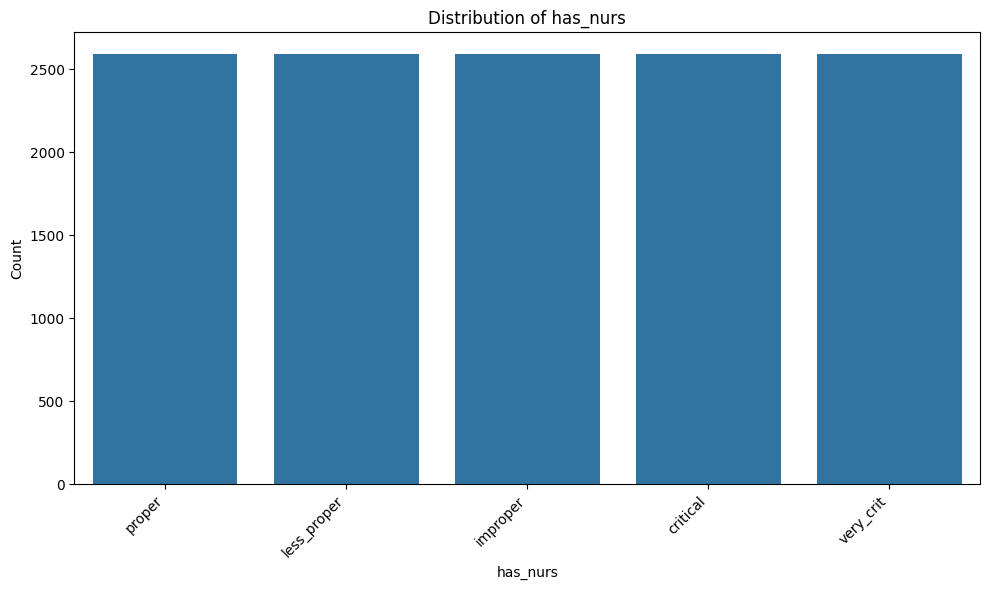

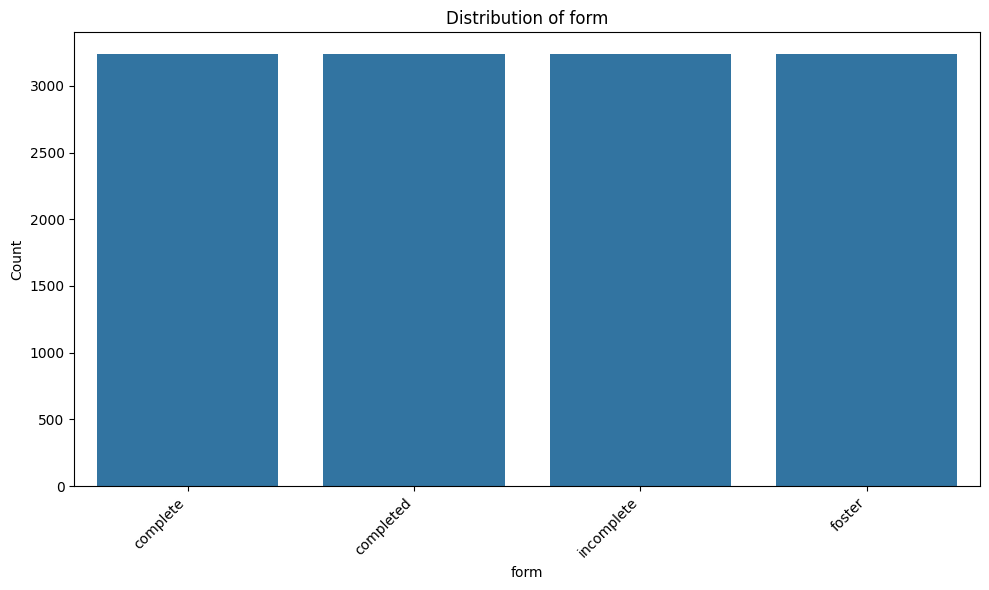

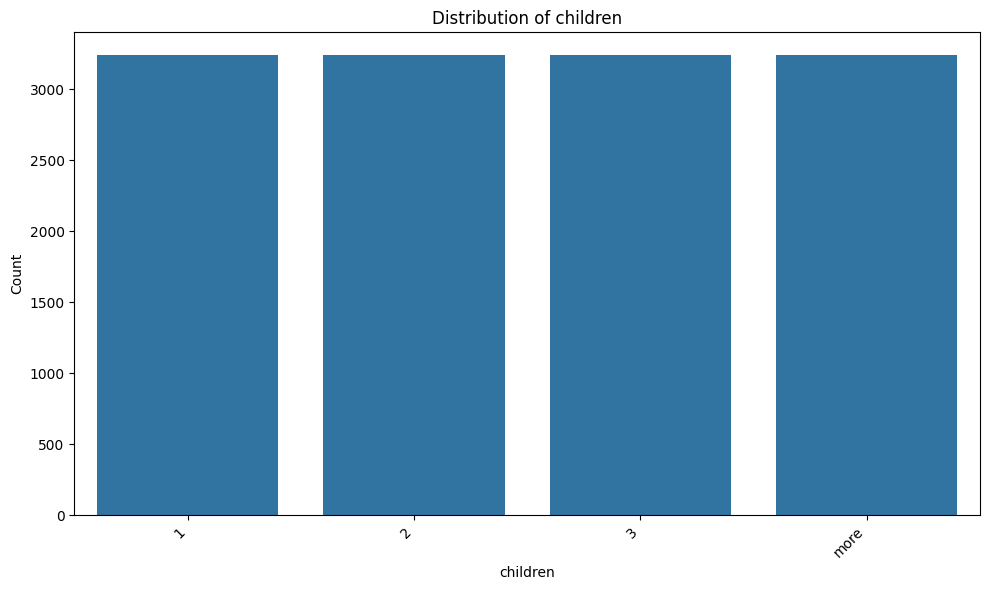

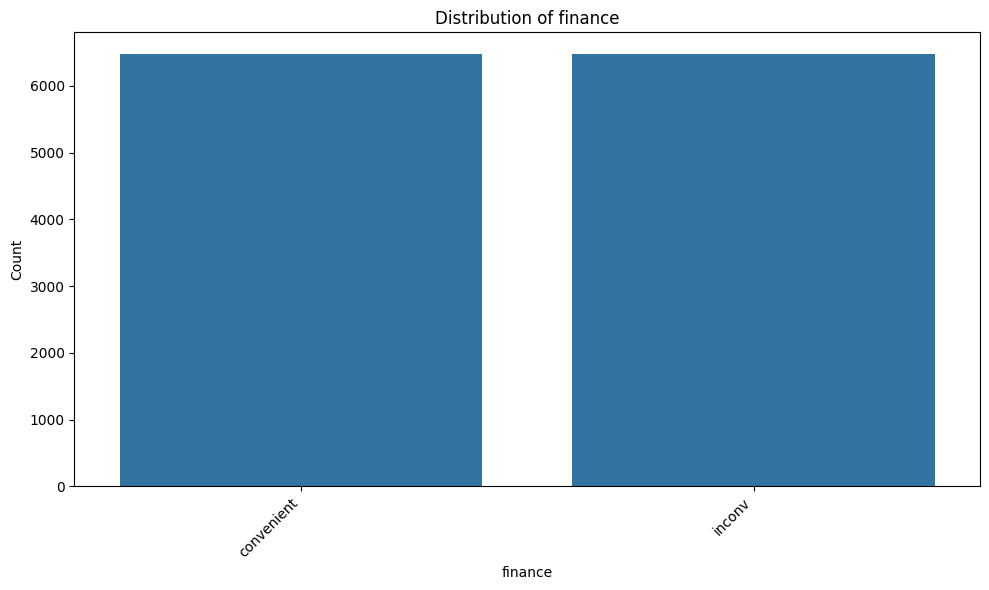

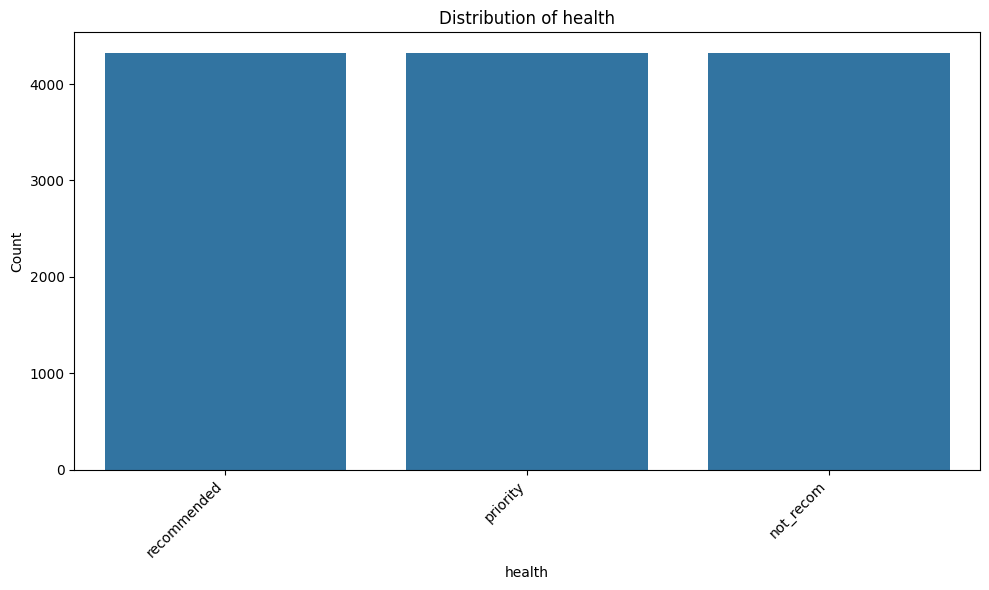

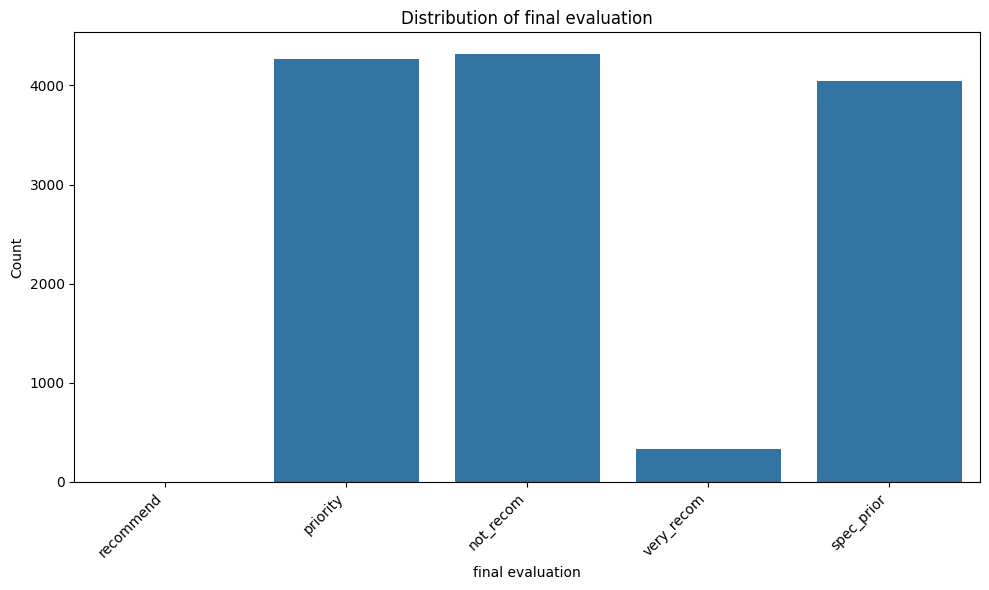

In [26]:
# Get a list of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Temporarily disable mathtext parsing for tick labels
plt.rcParams['text.usetex'] = False # Moved outside the loop to apply to all categorical plots

# Iterate through categorical columns and create countplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Ensure the data in the column is treated as string to avoid issues with non-string types
    sns.countplot(data=df, x=df[col].astype(str))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Bivaraite Analysis

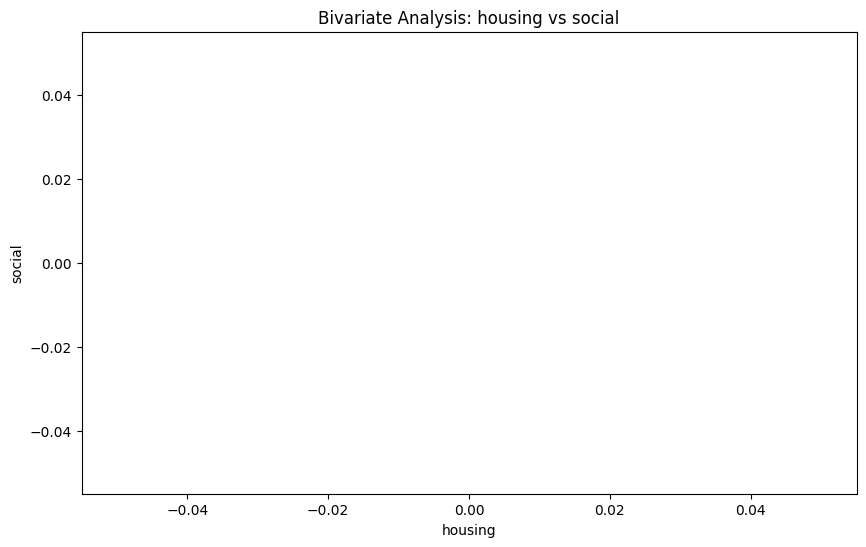

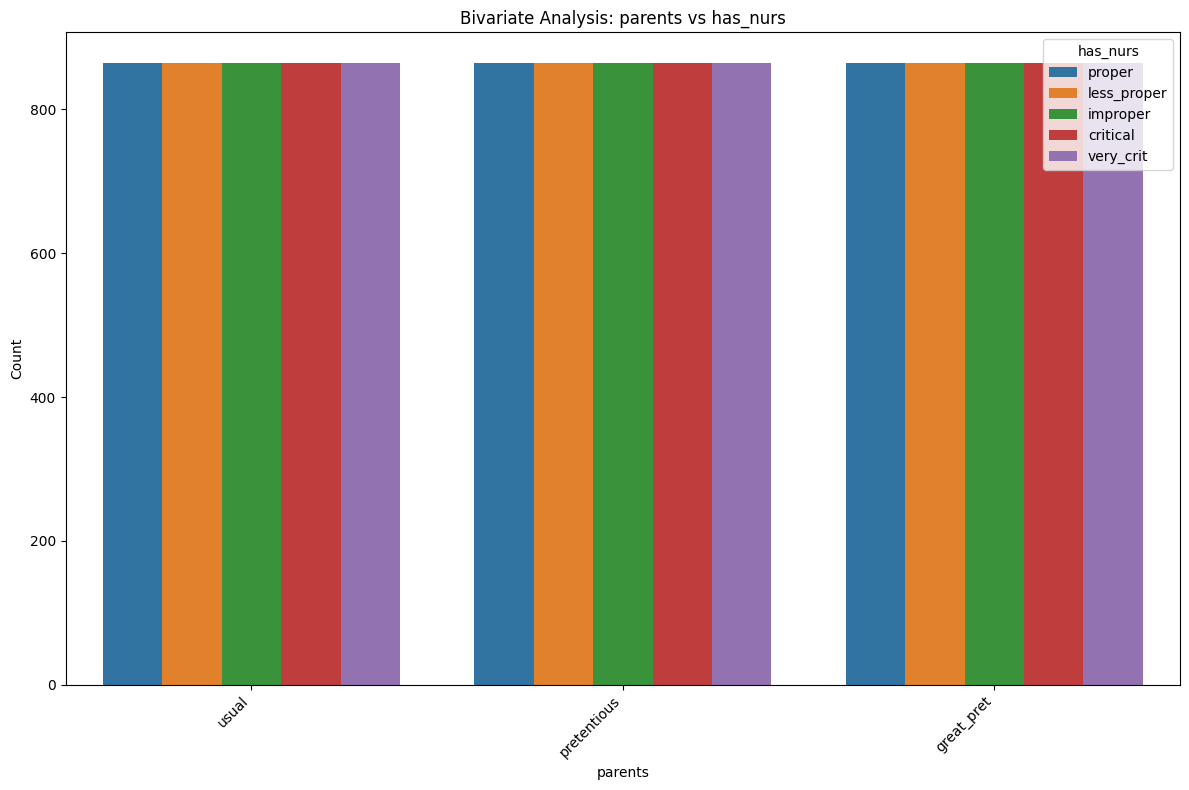

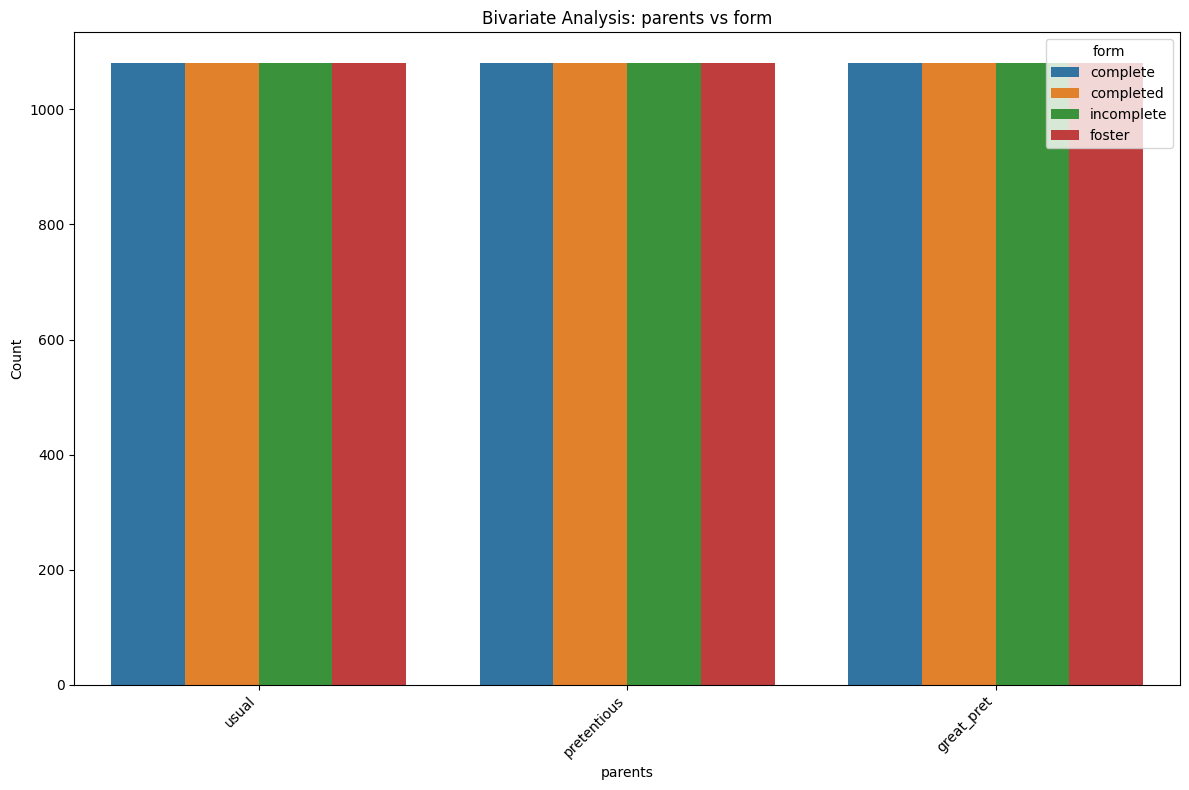

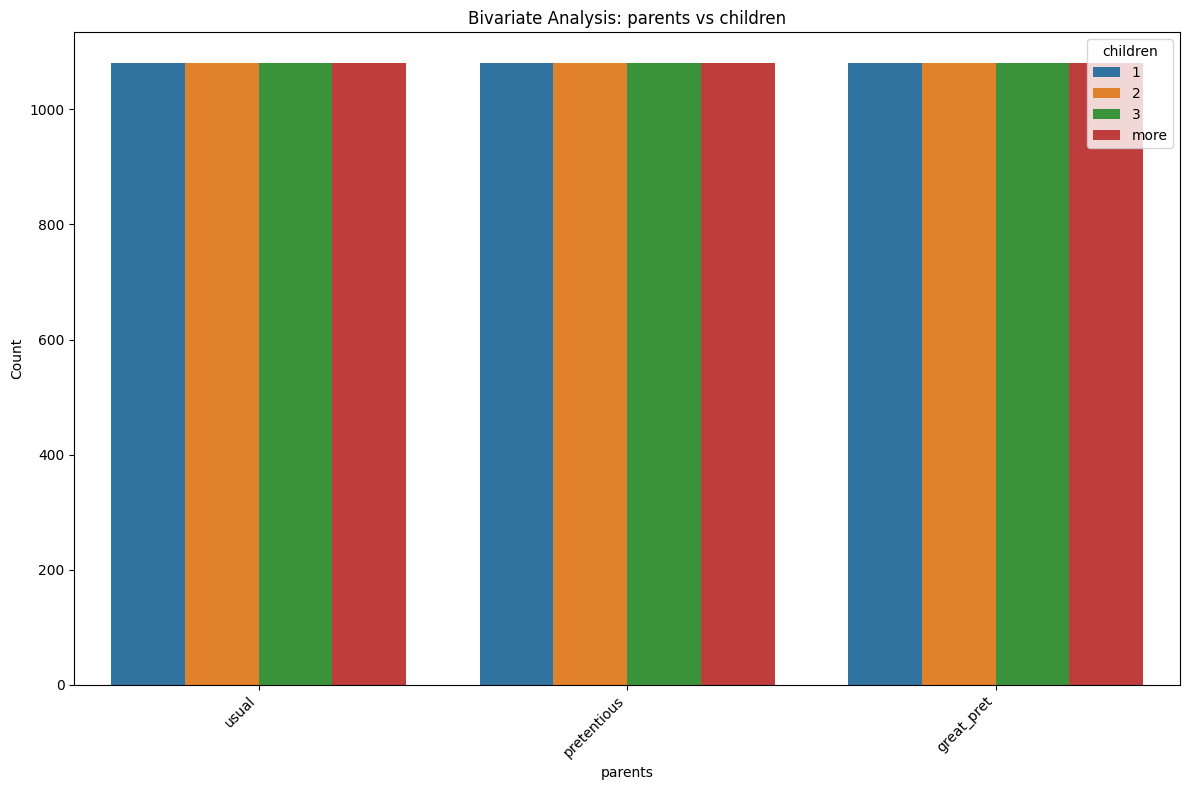

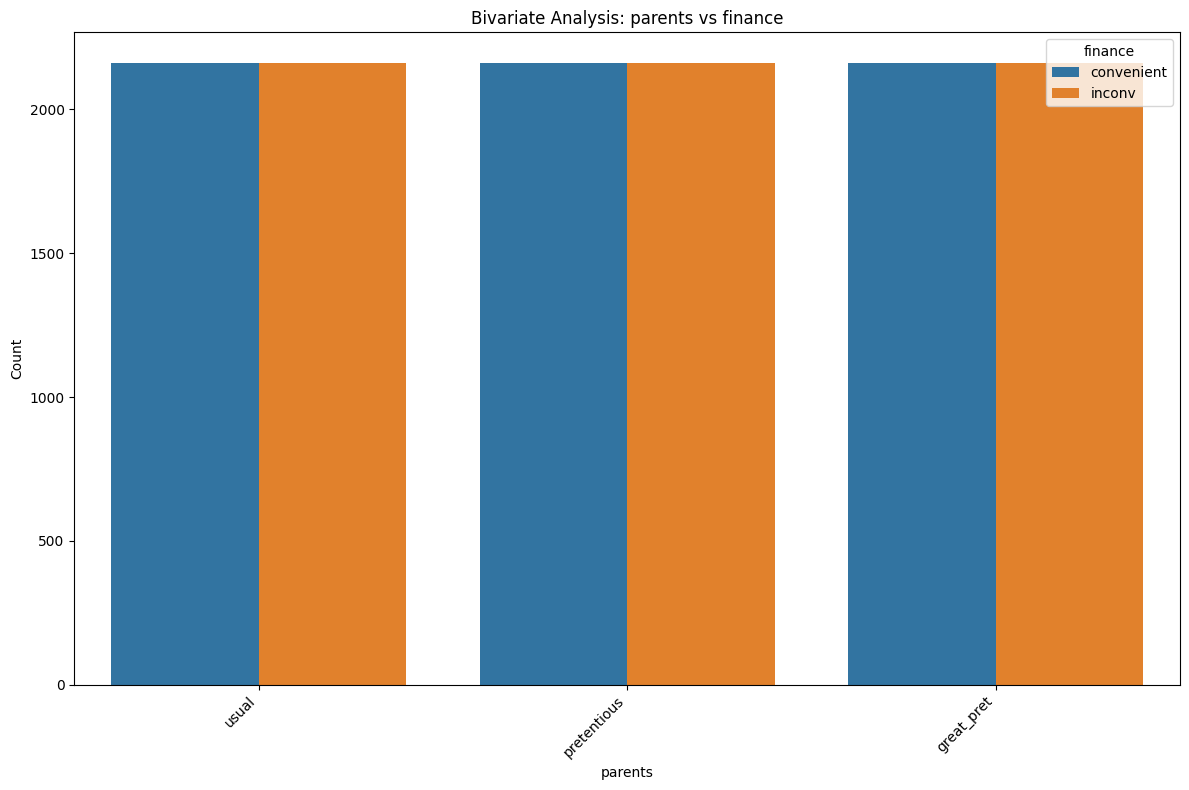

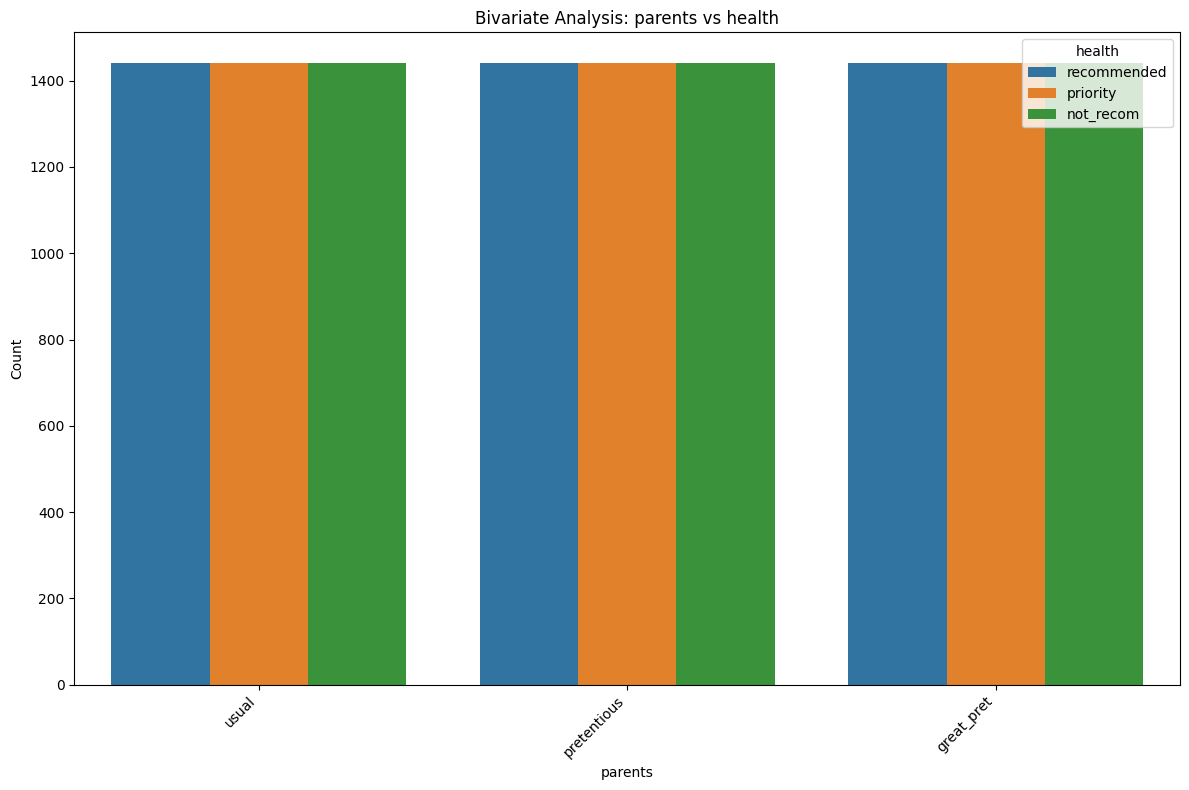

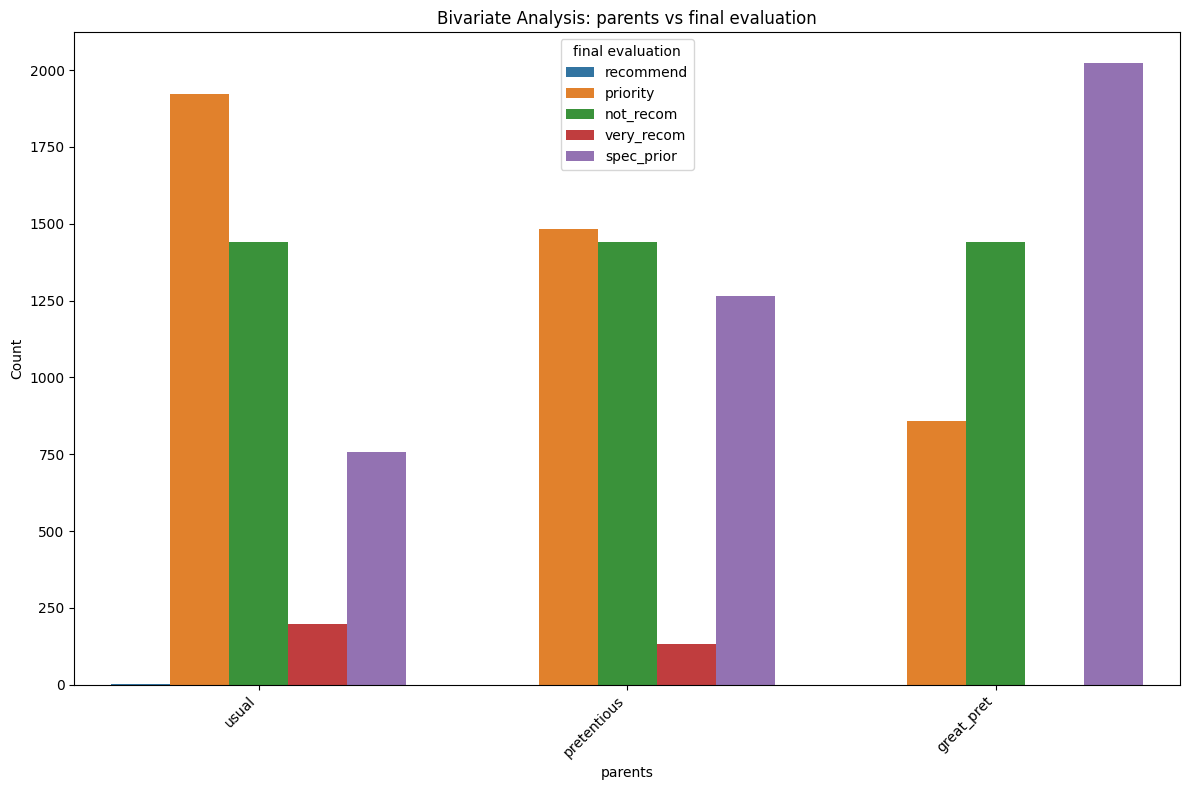

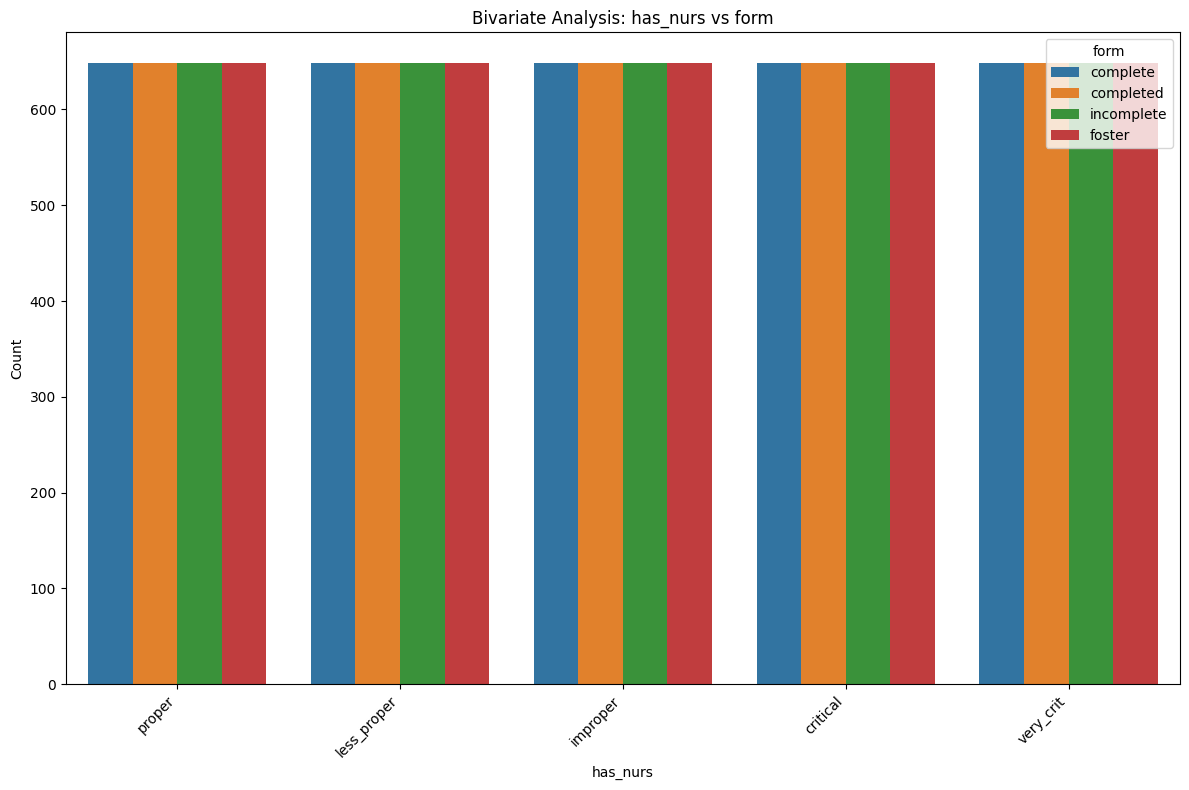

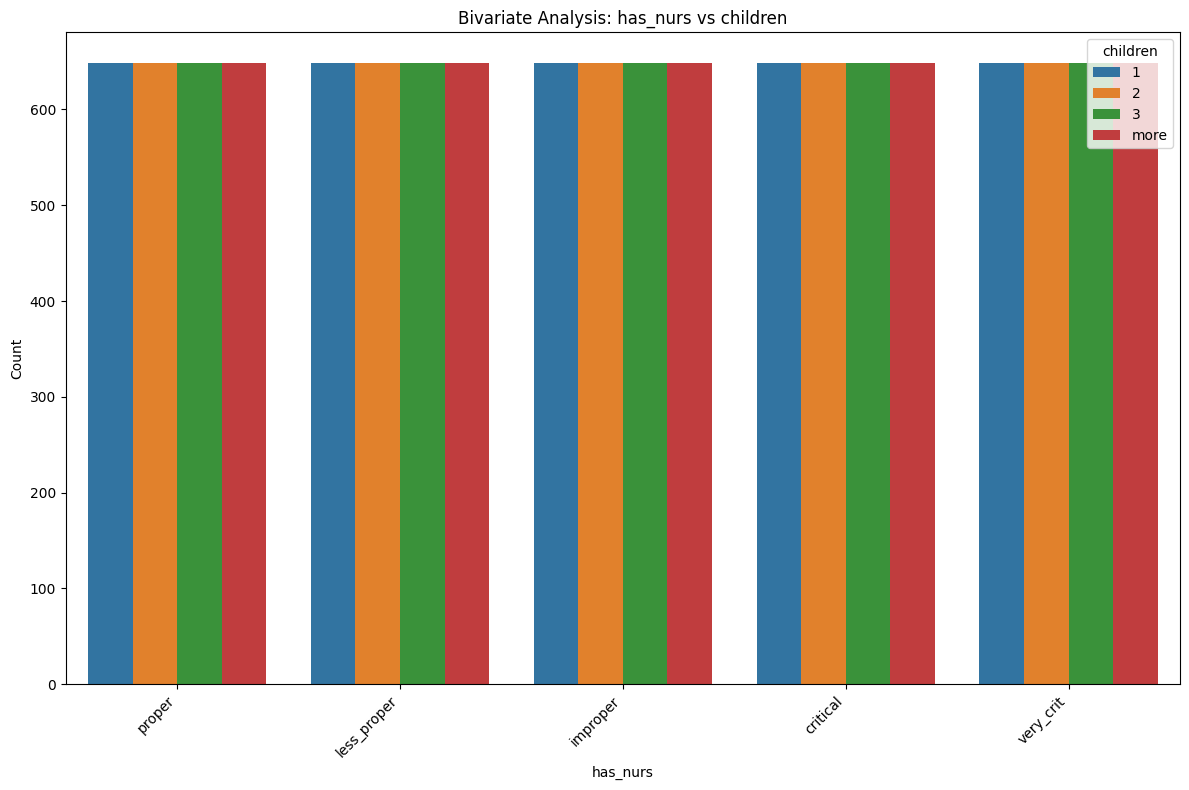

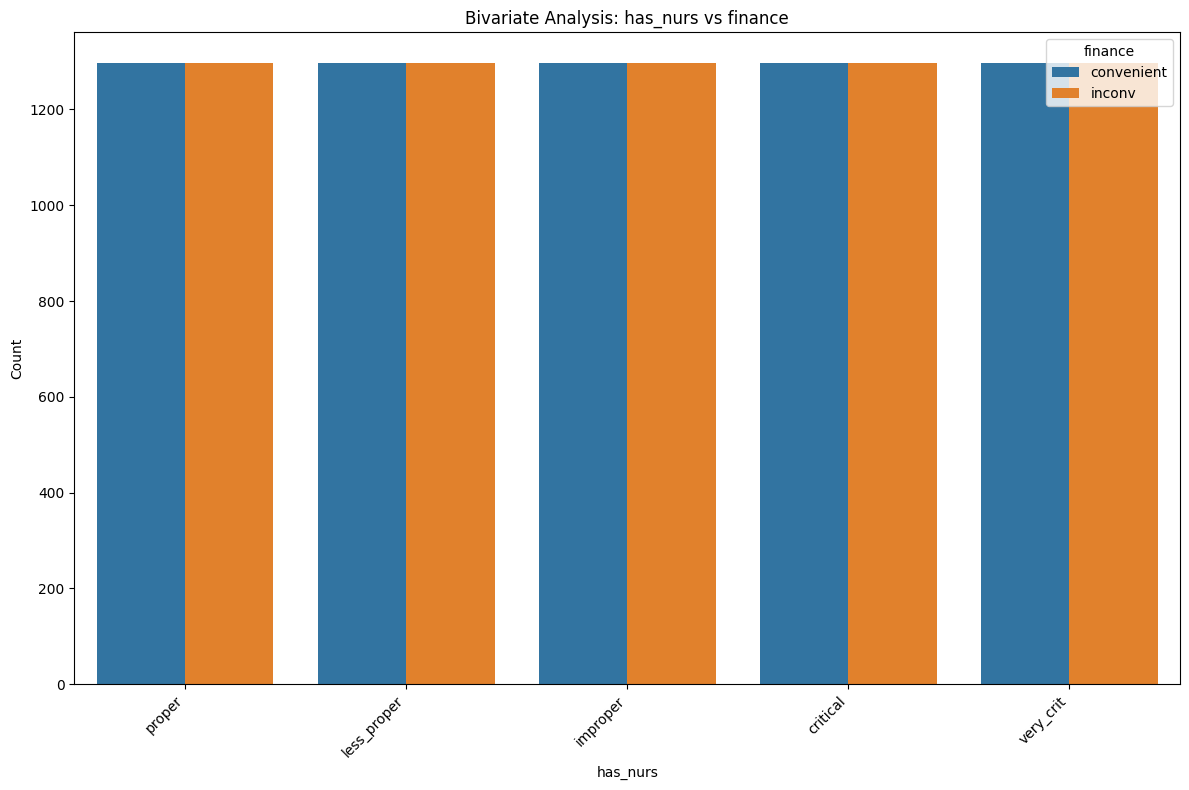

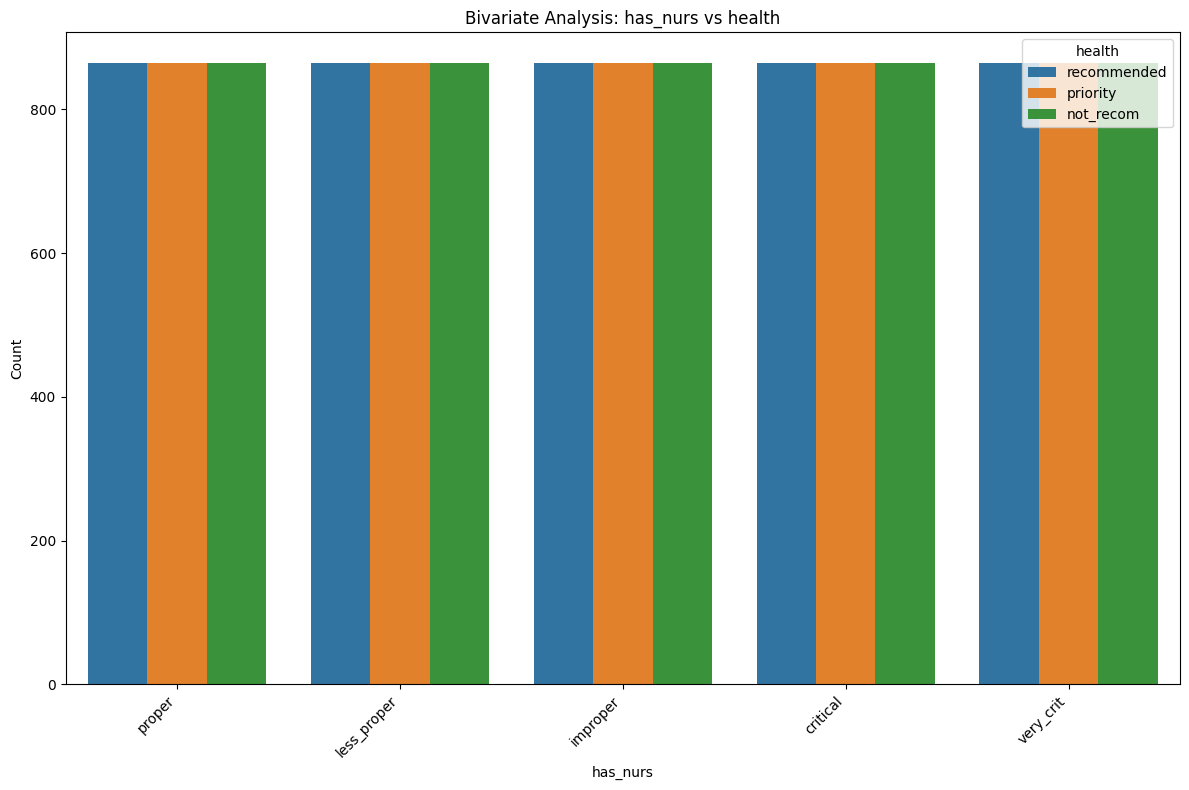

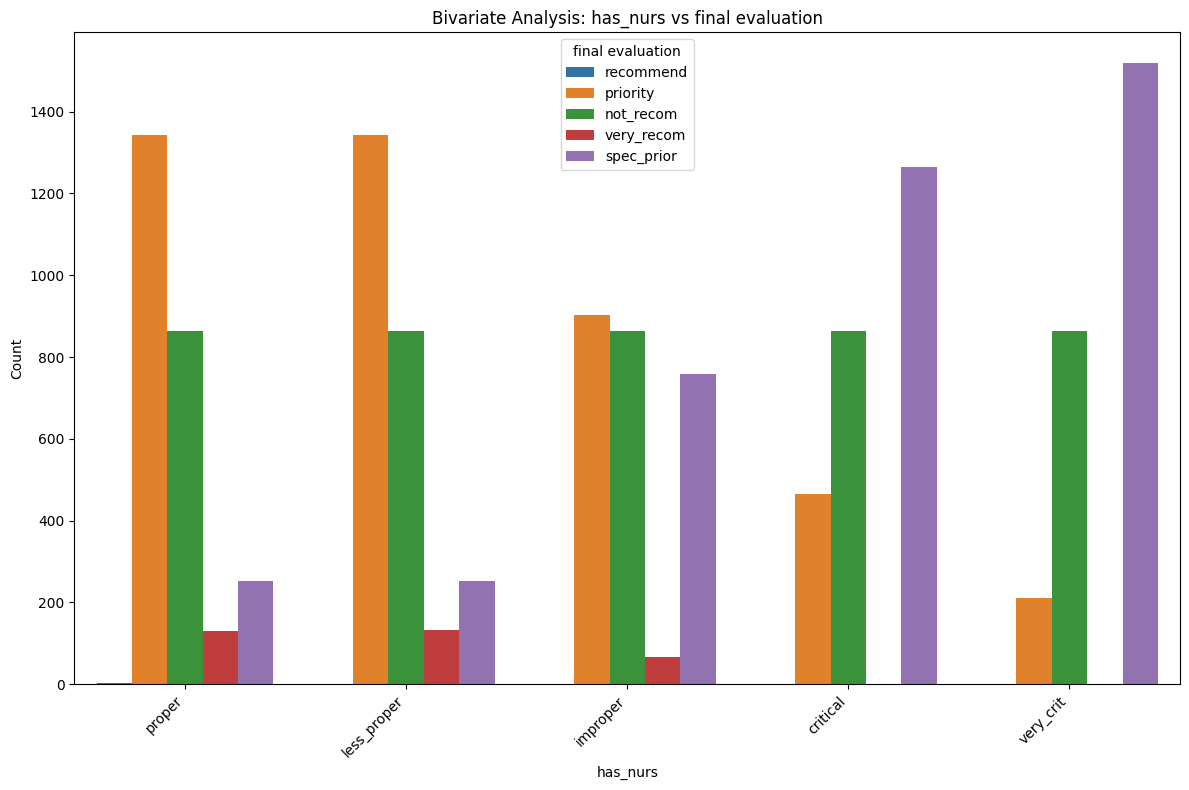

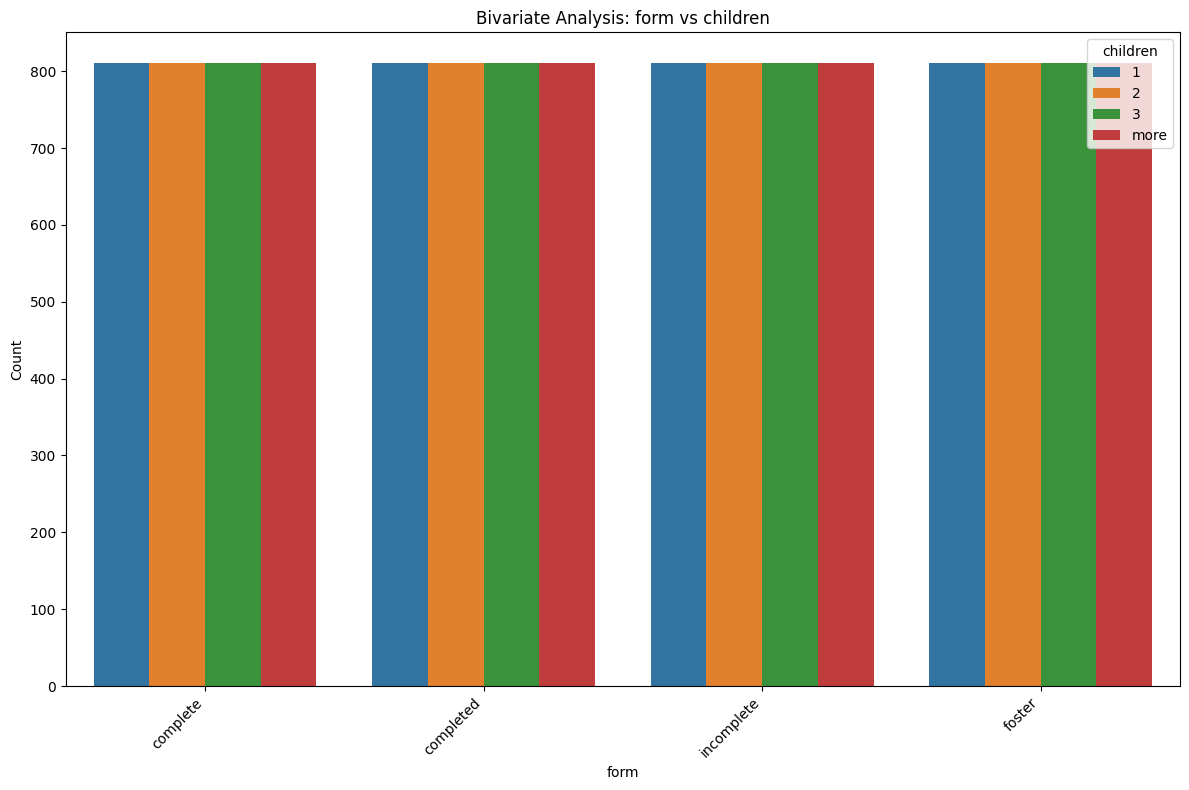

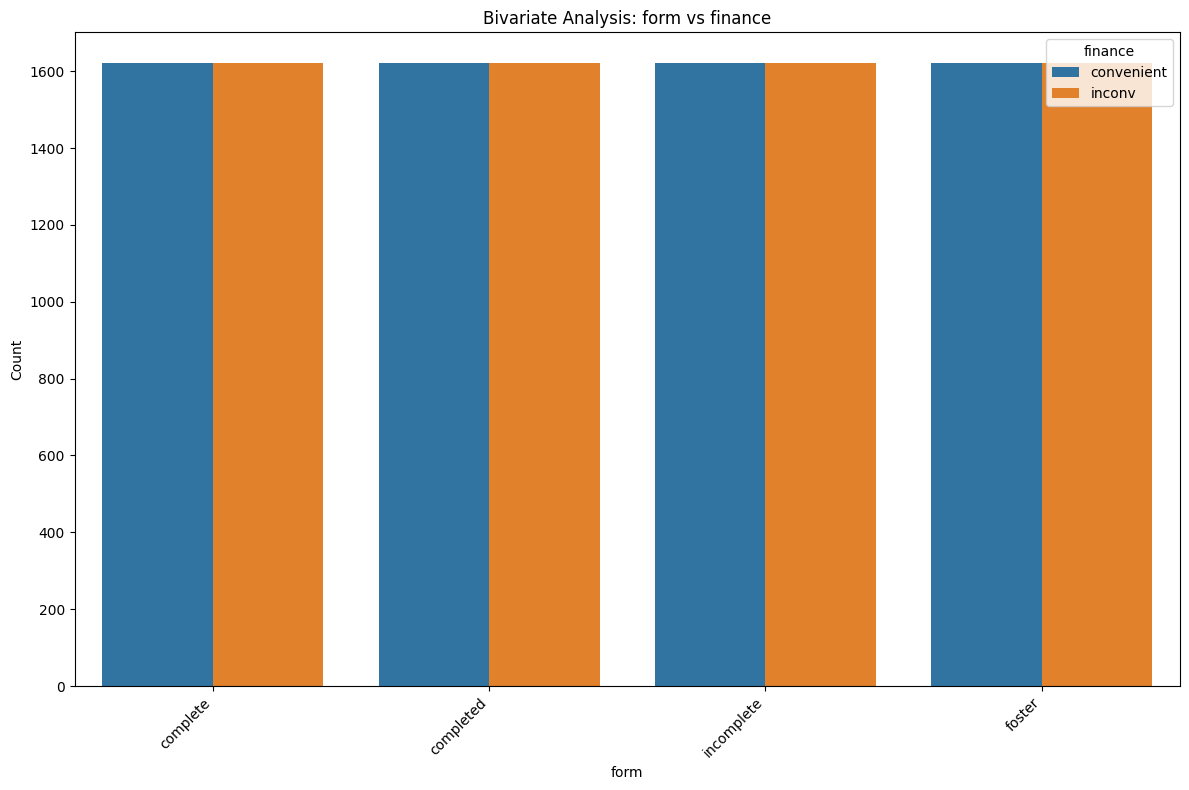

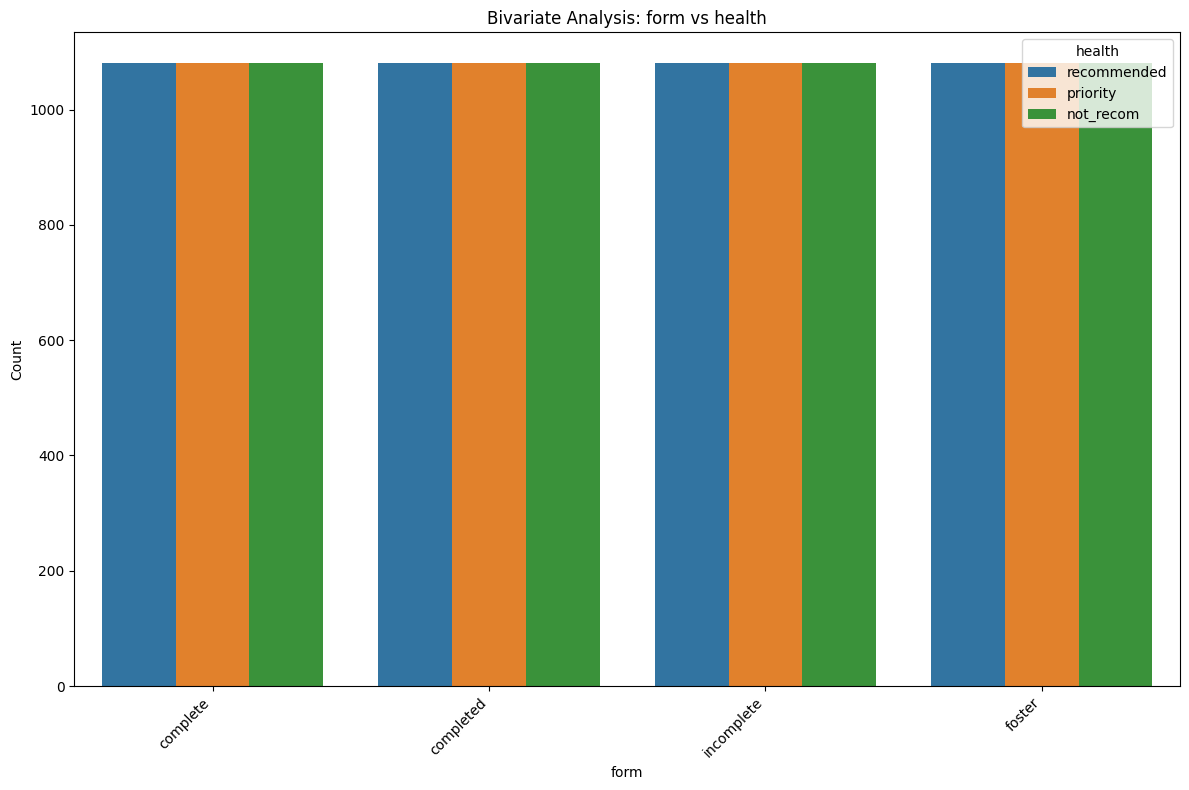

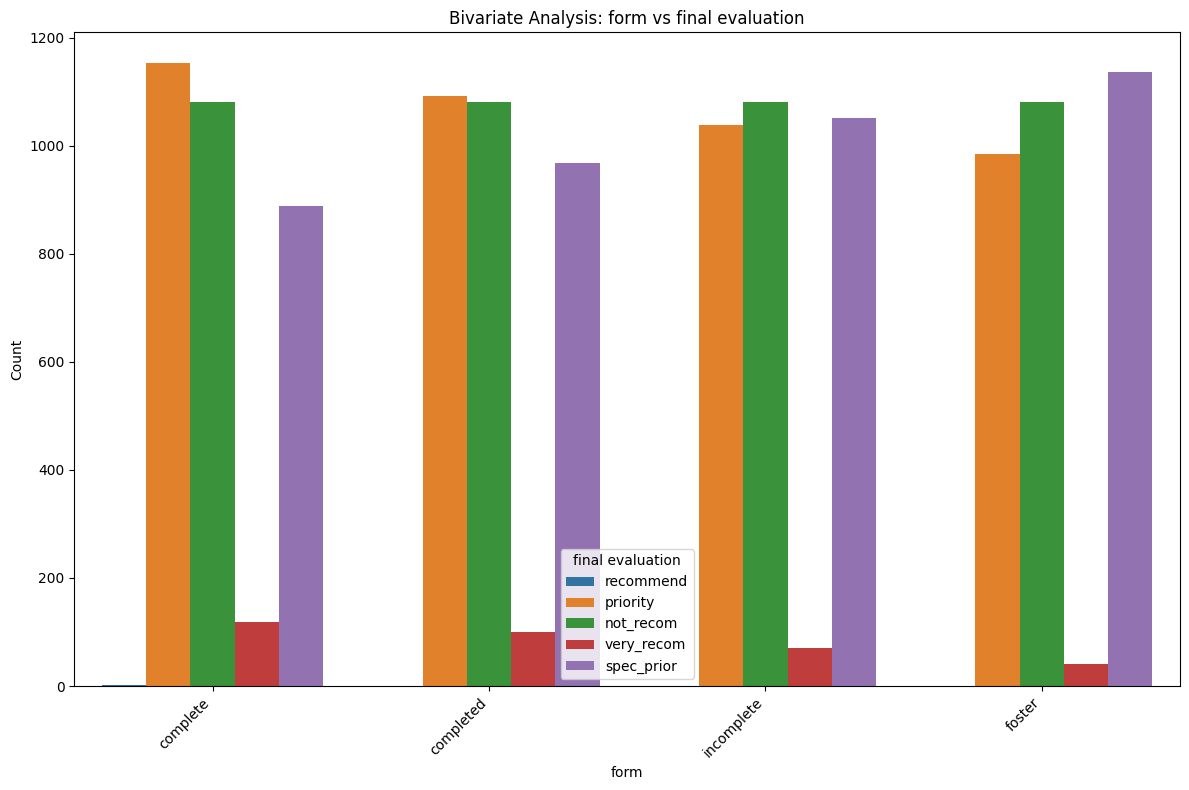

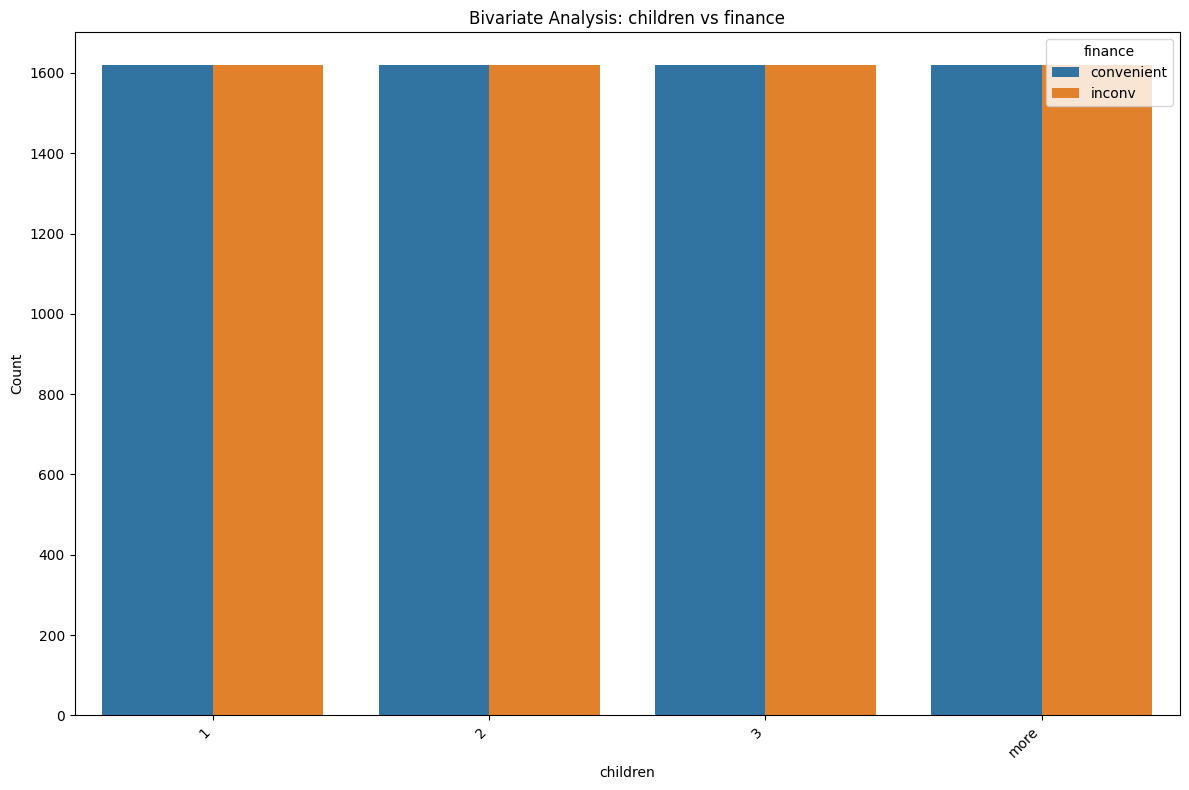

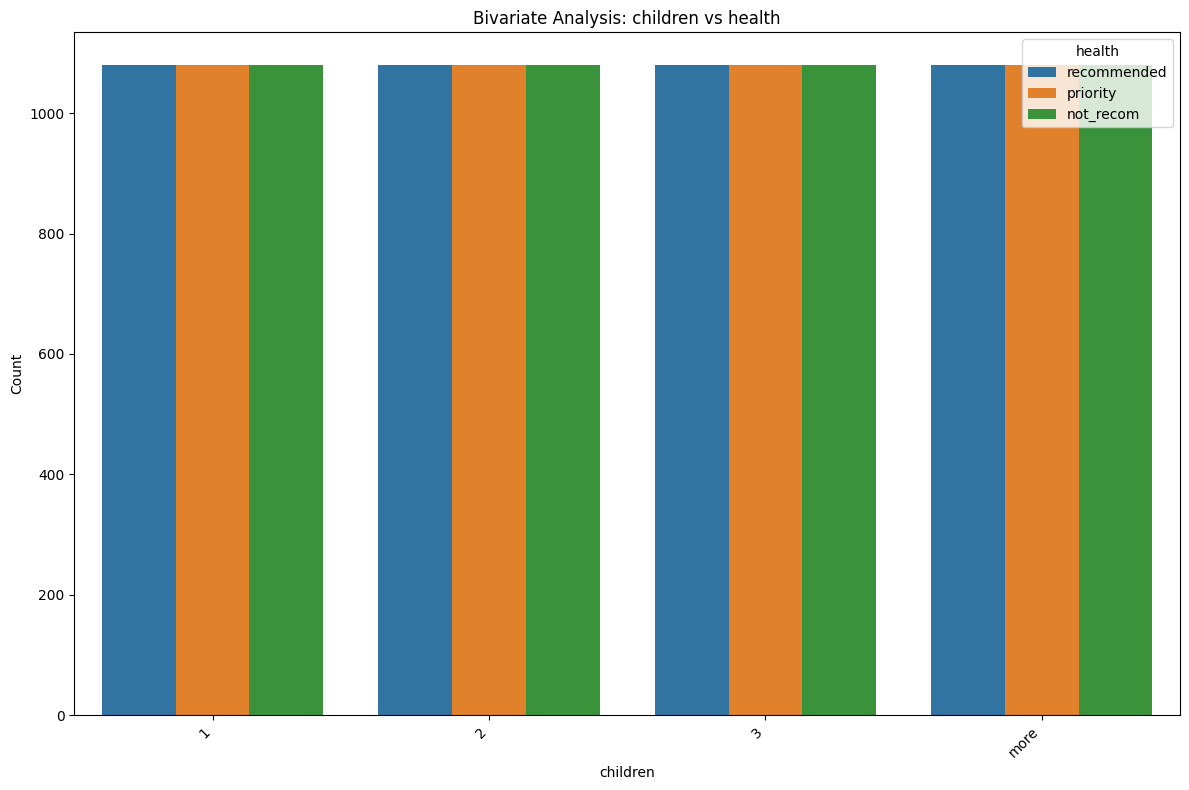

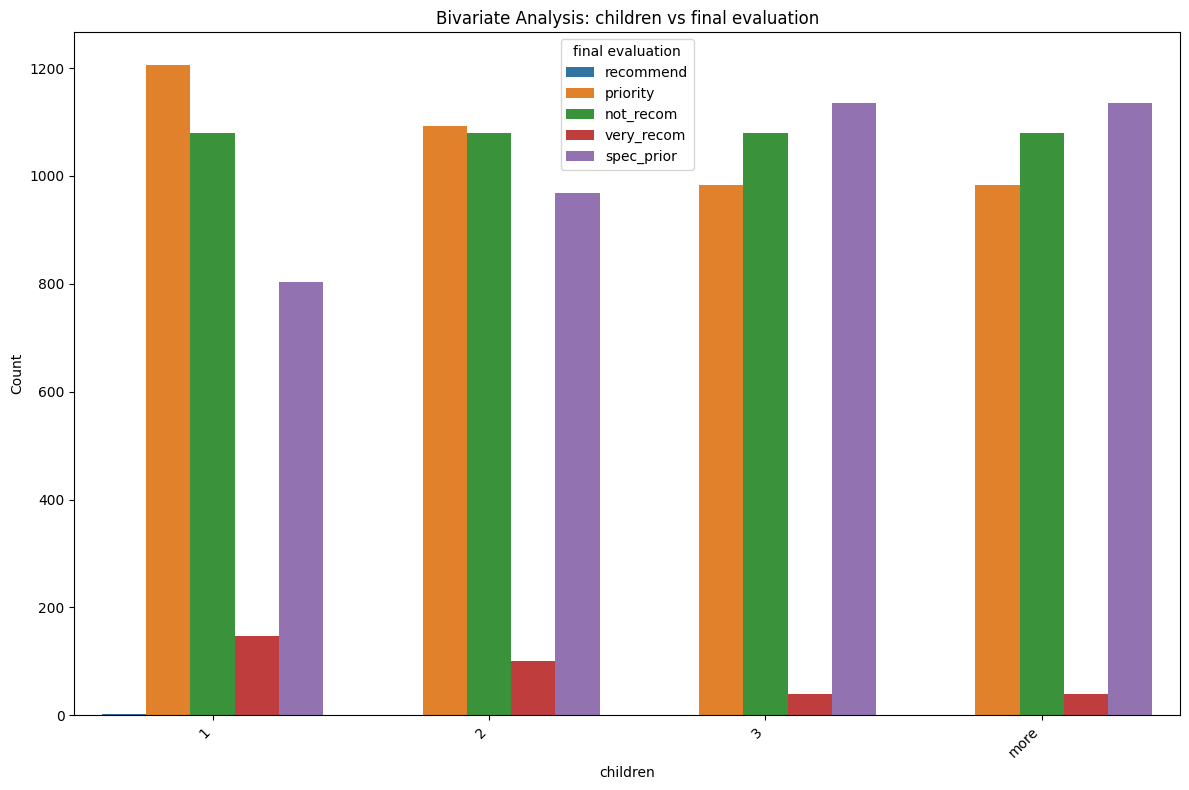

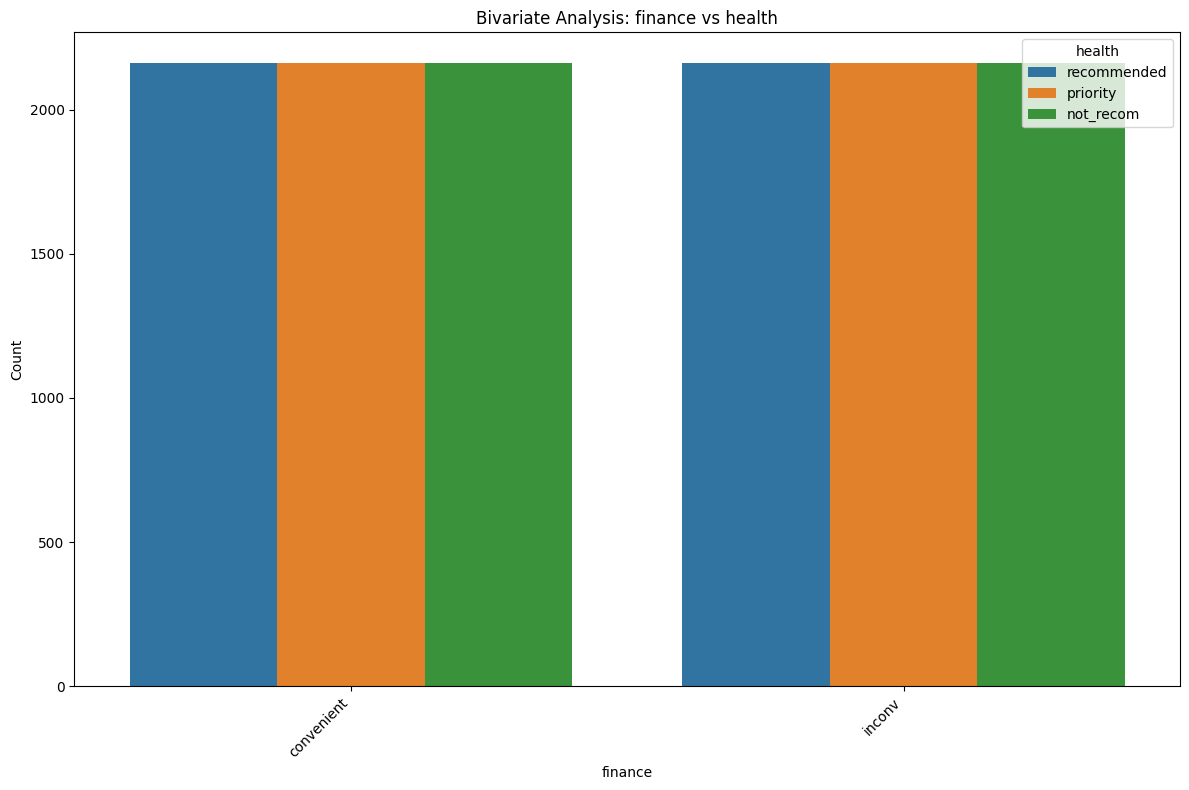

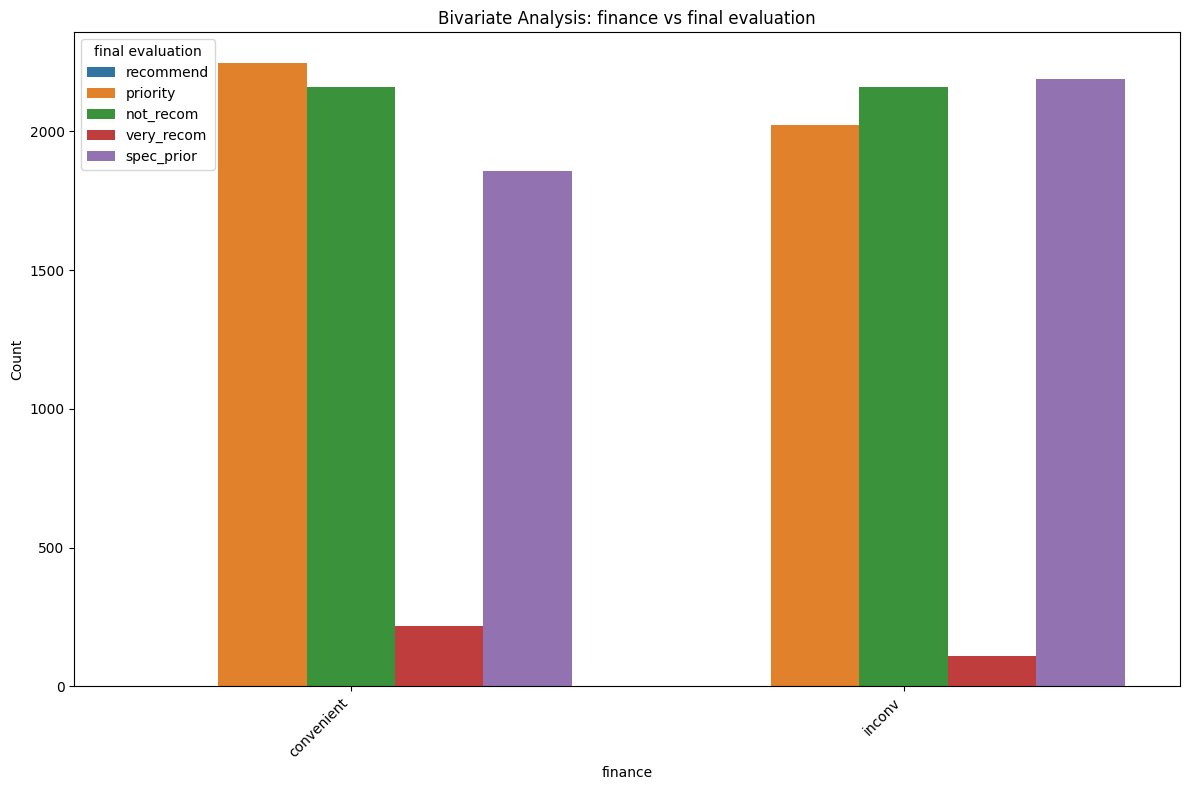

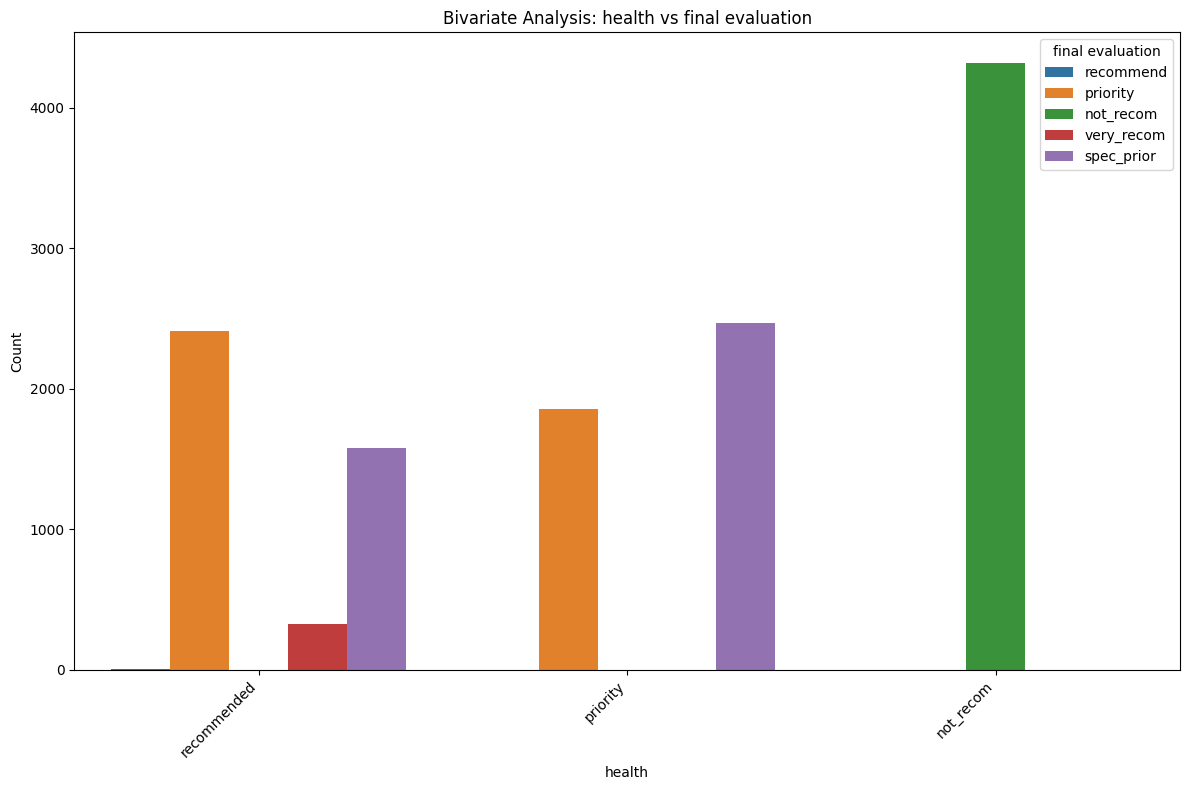

In [28]:
# Perform bivariate analysis for numerical columns using scatter plots
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.title(f'Bivariate Analysis: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

# Select categorical columns for bivariate analysis:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Perform bivariate analysis for categorical columns using countplots
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        plt.figure(figsize=(12, 8))
        sns.countplot(data=df, x=col1, hue=col2)
        plt.title(f'Bivariate Analysis: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=col2)
        plt.tight_layout()
        plt.show()

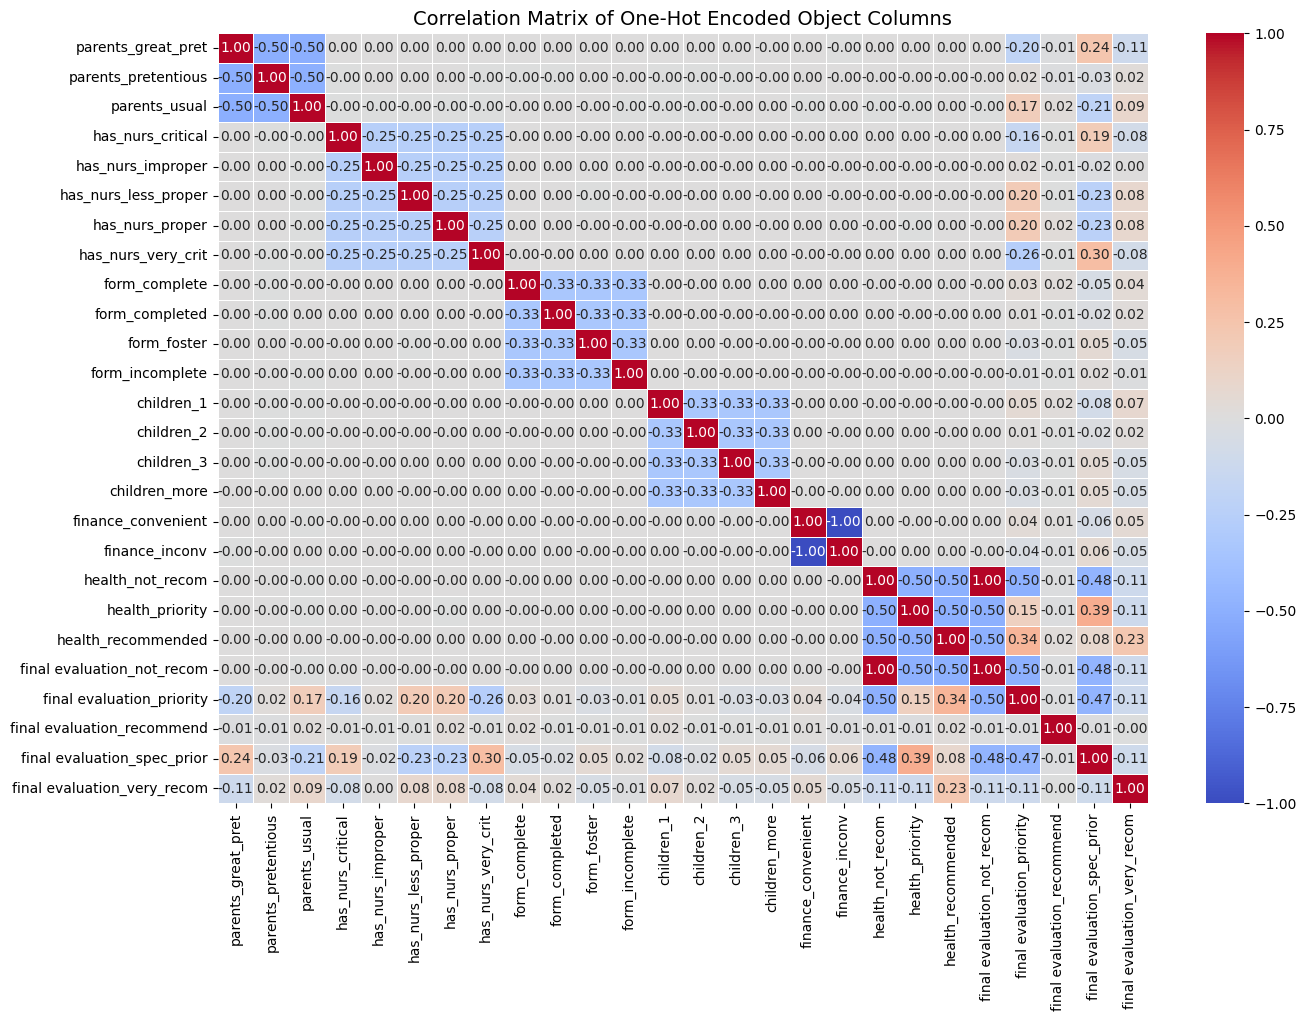

In [31]:
# Select only object (categorical) columns
object_df = df.select_dtypes(include='object').copy()

# Perform one-hot encoding on the object columns
object_df_encoded = pd.get_dummies(object_df)

# Calculate the correlation matrix for the encoded data
correlation_matrix_object = object_df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_object, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of One-Hot Encoded Object Columns", fontsize=14)
plt.show()

# Thank you